#  Project 2: WeRateDogs Data Wrangling
---
### By: Benjamin Adekunle Ojo

## Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import requests
import os

%matplotlib inline

##  Table of Content 
---

- Data Gathering 

- Data Assesing

- Data Cleaning

## Data Gathering
---

For this phase of the project we will be gethering our data from Udacity provided dateset, Tweeter API, and using requests package to extract data with url links. The following task will be under taking during this gathering phase: 
1. Downloading, uploading, and reading `twitter_archive_enhanced.csv` into the pandas dataframe.
2. Downlaoding `image_predictions.tsv` using the provided URL and using the requests package.
3. Using the Tweeter API to query tweet's tweeter I.D retweet, and like coount and saving as `tweet_json.txt`.


### Loading the Tweet Archive Dataset
---
Fistly, we will be downloading the `twitter-archive-enhanced.csv`dataset that was provided for us by Udacity, uploading or reading it into a pandas dataframe. 

In [2]:
# loading the twitter-archive-enhanced.csv dataset.

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Reading the top data. 

archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Downloading and Uploading `tweet_json.txt` as a DataFrame using Tweeter API.
---

We will be downloading and uploading the `tweet_json.txt`, but we will first have to have access to use the tweeter API and once we have been given access we will then authenticate the API with the access code that have been giving. So, after we have gotten access will then using the Tweeter API to extract the data for each tweet tweeter id, retweet, and like count. 

#### Authentication for Tweeter API
---

In [4]:

consumer_key = 'HIDE'
consumer_secret = 'HIDE'
access_token = 'HIDE'
access_secret = 'HIDE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())


#### Wrangling Tweet Data to Formulate `tweet_json.txt` JSON
---

Before we extract the whole dataset, we like to have a feel of how the dataset is divided individual. 

In [5]:
# Reading a data using Tweeter API using the archive tweet_id column. 
tweet = api.get_status(archive.tweet_id[0], tweet_mode='extended')

print(tweet['full_text'])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [6]:
# The number of Retweet for the given tweet_id.
tweet['retweet_count']

6981

In [7]:
# The number of like for the givne tweet_id.
tweet['favorite_count']

33725

In [8]:
# The Full JSON file for the just one tweet_id 
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [12]:
# This list will contain all feature that will make up the tweet_json.txt (tweet_id, Like count, and retweet count)
tweet_df = []

# Tweet_id that generate error will be appended to this list 
errors = []

for id in archive.tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        tweet_df.append({'tweet_id': int(id),
                        'favorite_count': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        errors.append(id)

892420643555336193 33771 6989
892177421306343426 29295 5291
891815181378084864 22028 3470
891689557279858688 36889 7214
891327558926688256 35260 7742
891087950875897856 17782 2595
890971913173991426 10348 1655
890729181411237888 56790 15726
890609185150312448 24487 3613
890240255349198849 27913 6085
890006608113172480 27002 6137
889880896479866881 24535 4152
889665388333682689 41990 8332
889638837579907072 23633 3707
889531135344209921 13343 1877
889278841981685760 22089 4435
888917238123831296 25603 3755
888804989199671297 22443 3525
888554962724278272 17293 2871
888078434458587136 19131 2892
887705289381826560 26586 4531
887517139158093824 40669 9834
887473957103951883 60112 14996
887343217045368832 29560 8800
887101392804085760 26944 4977
886983233522544640 30329 6301
886736880519319552 10490 2624
886680336477933568 19705 3726
886366144734445568 18528 2627
886267009285017600 105 4
886258384151887873 24489 5275
886054160059072513 0 93
885984800019947520 28572 5602
885528943205470208 

KeyboardInterrupt: 

In [ ]:

# List of tweet_id that we can't extract the data from them. 
print(errors)
print(len(errors))

In [ ]:
# Highlight for the tweet_df. 
print(tweet_df)

In [ ]:
tweet_df[0]

In [ ]:
# Loading the tweet_json.txt and wtiting.
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_df, file)

# Reading the data into a dataframe
tweet_json = pd.DataFrame(tweet_df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

# Converting the Dataset into .CSV formate
tweet_json.to_csv('tweet_json.csv',encoding='utf-8',index=False)

In [4]:
# Loading the dataset. 
tweets_json = pd.read_csv('tweet_json.csv',encoding='utf-8')

In [5]:
# Reading top of dataset.
tweets_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33806,7003
1,892177421306343426,29321,5301
2,891815181378084864,22042,3478
3,891689557279858688,36926,7224
4,891327558926688256,35308,7757


### Loading Image Predictions Using Requests Package
---

For this part of the data wranging phase we will be import the image predictions from Udacity server using the URL provided, using the requests python package. 

In [6]:
# The Image predication tsv file URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Request statement extract the data from the URL good and over ae 
response = requests.get(url)
response

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000003114834940>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [7]:
#Create a file for image predictions dataset.
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [8]:
#Write image predictions data to a file in our folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

NameError: name 'response' is not defined

In [9]:
# Reading the dataset into a DataFram. 
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
# Summary top of dataset. 
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



### Hightlight of all the Wrangled Data. 

In [11]:
# Heading for the the Archive Dataset
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
#Heading of the Image Predicton Dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# Heading for the JSON file.
tweets_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33806,7003
1,892177421306343426,29321,5301
2,891815181378084864,22042,3478
3,891689557279858688,36926,7224
4,891327558926688256,35308,7757


## Data Assesment
---

The next step for us is to assess the data we just collected, In other to identify any issues with our data quality and tideness, and documenting this errors. For this task we will be using the two type of data assessment which are: 
- Visual Assessment 
- Programmatic Assessment

For the dataset `archive` will be observing for any qualitative and structural problems. 

### Visual & Programmatic Assessment

For each of the dataset we will be assessing them for any data quality and tideness issue. 

In [14]:
# Visual Assessment for archive dataset
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
# Programmatically Assessing the dataset 

# Checking the data structure of the dataset
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Checking the unique make up for column. 

columns = archive.columns

columns

for column in columns: 
    print(archive[column].unique())


[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
[           nan 8.86266357e+17 8.81607037e+17 8.79553827e+17
 8.70726203e+17 8.63425646e+17 6.67152164e+17 8.57156678e+17
 8.55818117e+17 8.56286004e+17 8.55861584e+17 8.55858536e+17
 8.50328819e+17 8.48212112e+17 8.47606176e+17 7.59099524e+17
 8.40698300e+17 8.38145499e+17 8.38085539e+17 8.35245984e+17
 8.32087548e+17 8.31903044e+17 8.26598365e+17 8.23326389e+17
 8.21152593e+17 8.13127252e+17 8.11627233e+17 7.33109485e+17
 8.01854331e+17 8.00857954e+17 7.97123751e+17 7.72743019e+17
 7.66711819e+17 7.63865175e+17 7.50180499e+17 7.47648654e+17
 7.46885919e+17 6.91416866e+17 7.38411920e+17 7.29113531e+17
 7.07980066e+17 7.03255936e+17 7.04485745e+17 7.03041950e+17
 6.96488711e+17 6.75349384e+17 6.70668383e+17 6.93642232e+17
 6.93572216e+17 6.92417313e+17 6.92041935e+17 6.90341254e+17
 6.86034025e+17 6.85547936e+17 6.84959799e+17 6.84481075e+17
 6.84222868e+17 6.8278844

In [17]:
archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [18]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [20]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:

archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

### Observed Issues from Assessment.

#### Quality Issues:


#### Tidiness issue:
>1. Combining the four dog stage(`doggo`, `floofer`, `pupper`, `puppo`) into one column called Dog Stage.
>
>2. Joining the three dataset into one using the`tweet_id` column as the primary key to join the dataset.

## Data Cleaning
--- 
For the final stage of the wrangling process, we would be cleaning all observed issues for both quality and tideness. this clearing phase will be divided into quality issues and tideness issuesj and at the end will marge all of dataset into one but before we do anything on our dataset let first creat a copy.

### Creating a Copy of the Dataset.

In [45]:
#Creat a copy of the archive dataset
archive_cp = archive.copy()

#Creat a copy of the tweet_json dataset
tweets_jcp = tweets_json.copy()

#Creat a copy of the image_predictions dataset 
image_pre_cp = image_predictions.copy()

### Qualitative Issues

>We will first start by cleaning for dataset with quality issues, and they are as follows: 
>
>1. The url in the  `source` column needs to be extracted or delete otther stricks that are part of the url. 
>2. Convertint the `tweet_id`, `image_predication.tweet_id` and `tweet_json.tweeted_id` from int to objects since this is not a value that we can perform math operation on and make any sense after. 
>3. Converting the formate for the `timestamp` and `retweeted_status_timestamp` from object to datetime formate.
>4. Converting `image_predication.tweet_id` and `tweet_json.tweeted_id` to str.
>5. Removing the string 'html' tag from the expanded url and source url. 
>6. Replace the 'None' string from the dog stage columns of `doggo`, `floofer`, `pupper`, and `poppo`
>7. Renaming the columns without properal name description. 
>8. Removing the retweet columns and rows where retweet is true or is not null. 

#### Issue 1: The url in the  `source` column needs to be extracted or delete otther stricks that are part of the url. 


##### Defining the Problem

>The issue with this column is that the tweet URL is enclose in other irrelevant strings that needs to be removed. So, That is what we are going to be doing in this issue.

##### Code


In [46]:
# testing on how data set can be divided using the splite function.
archive_cp.source.str.split('\"', expand=True).head()



,0,1,2,3,4
0,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
1,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
3,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
4,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>


In [47]:
# Applying it to the dataset

# archive_cp.source.str.split('\"').apply(lambda x: x[1])
archive_cp.source = pd.DataFrame(archive_cp.source.str.split('\"').apply(lambda x: x[1]))   

##### Test

In [48]:
# Highlighting the top header
archive_cp.head()

#As we can see the source column only contains link

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue 2: Convertint the `tweet id`, `image_predication.tweet_id` and `tweet_json.tweeted_id` from int to object

#### Define


>The `tweet_id`, `image_predication.tweet_id` and `tweet_json.tweeted_id`need to be converted to object formate and this is because the value in data that can't be add or perform math operation and with out giving any meaningful interpretation should be seen as object and not int. This will make it easy to work with the data and also to avoid making mistake when working with the column. 


##### Code 

In [100]:
# Converting the tweet_id column to object 
archive_cp.tweet_id = archive_cp.tweet_id.astype(str)
image_pre_cp.tweet_id = image_pre_cp.tweet_id.astype(str)
tweets_jcp.tweet_id = tweets_jcp.tweet_id.astype(str)

##### Test

In [102]:
# confirming if the data type of changed 
print(archive_cp.tweet_id.info()) # from the resu

print(image_pre_cp.tweet_id.info())

print(tweets_jcp.tweet_id.info())

<class 'pandas.core.series.Series'>
Int64Index: 2164 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2164 non-null   object
dtypes: object(1)
memory usage: 33.8+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2283 entries, 0 to 2282
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2283 non-null   object
dtypes: object(1)
memory usage: 18.0+ KB
None


#### Issue 3: Converting timestamps to datetime values

##### Defining the Problem

>For consistence sack we would be changing the data into the datatime formate.

##### Code

In [51]:
#Firstly we need to remove the last 6 characters " +0000"
archive_cp.timestamp = archive_cp.timestamp.str.split('+', expand=True)[0].str.strip()
archive_cp.retweeted_status_timestamp = archive_cp.retweeted_status_timestamp.str.split('+', expand=True)[0].str.strip()

#Convert to datetime
archive_cp.timestamp = pd.to_datetime(archive_cp.timestamp)
archive_cp.retweeted_status_timestamp = pd.to_datetime(archive_cp.retweeted_status_timestamp)

##### Test:

In [52]:
# Checking the data frome of the dataset.
archive_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### Issue 4:  Cleaning incorrect rating from rating column (`rating_denominator`, `rating_numerator`).

##### Defining the Problem:
>
>During the course of my assessment i discovered that some values in the rating columns were incorrect, the `rating_denomiator` have values that are greater than 10 of which is incorrect, and for the `rating_numerator` decimal values are pick as achual rating. So, in order to correct this error we will be doing the following: 
>
> * Replacing values from the rating_denominator columns that are greater than 10. 
> * Picking the right rating from the rating_numerator columns using regax and str.contain() columns.
> 


##### Code

In [53]:
# hightlighting values from rating denominator 
# that are greater than 10 
archive_cp.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [54]:
# Break down of rating numerator columns 
archive_cp.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [55]:
# Extracting numerator rating form text.
rating  = archive_cp.text.str.extract('((?:\d+)?\d+)\/(\d+)',expand = True)
rating

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [56]:
# Replacing rating_numerator rating columns with corrected rating
archive_cp.rating_numerator = rating[0]

In [57]:
# Replacing values that are greater than 10. 

archive_cp.rating_denominator = rating[1]

##### Test

In [61]:
# Checking the break down of the rating columns 
print(archive_cp.rating_denominator.value_counts())

print(archive_cp.rating_numerator.value_counts())

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
00        1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64
12      558
11      464
10      461
13      351
9       158
8       102
7        54
14       54
5        37
6        32
3        19
4        17
2         9
1         9
0         2
75        2
15        2
420       2
45        1
60        1
44        1
143       1
144       1
26        1
99        1
121       1
20        1
80        1
17        1
50        1
204       1
1776      1
165       1
27        1
24        1
84        1
007       1
960       1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64


#### Issue 5:  Removing the string 'html' tag from the expanded urls and source url. 

##### Define: 
> From the exatract and source columns we can observe that there seems to be a string with at the begining of the analysis, this affact our values in this columns as we don't need them in other for our url to function properly. So, in other to clean our data we will be removing this strings from each value. 


##### Code:

In [62]:
# testing on how data set can be divided using the splite function.
archive_cp.source.str.split('//', expand=True).head()

,0,1
0,http:,twitter.com/download/iphone
1,http:,twitter.com/download/iphone
2,http:,twitter.com/download/iphone
3,http:,twitter.com/download/iphone
4,http:,twitter.com/download/iphone


In [63]:
# Tasting the expended urls columns 
archive_cp.expanded_urls.str.split('//', expand=True)[1].head()

0    twitter.com/dog_rates/status/89242064355533619...
1    twitter.com/dog_rates/status/89217742130634342...
2    twitter.com/dog_rates/status/89181518137808486...
3    twitter.com/dog_rates/status/89168955727985868...
4    twitter.com/dog_rates/status/89132755892668825...
Name: 1, dtype: object

In [64]:
# Applying it to the source column dataset
      
# Removing html tags from source column. 
archive_cp.source = pd.DataFrame(archive_cp.source.str.split('//').apply(lambda x: x[1]))

In [65]:

# Removing html tags from expanded urls column. 
archive_cp.expanded_urls = pd.DataFrame(archive_cp.expanded_urls.str.split('//', expand=True)[1])

##### Test: 

In [66]:
# Viewing changes on columns
archive_cp[['source', 'expanded_urls']].head()

,source,expanded_urls
0,twitter.com/download/iphone,twitter.com/dog_rates/status/89242064355533619...
1,twitter.com/download/iphone,twitter.com/dog_rates/status/89217742130634342...
2,twitter.com/download/iphone,twitter.com/dog_rates/status/89181518137808486...
3,twitter.com/download/iphone,twitter.com/dog_rates/status/89168955727985868...
4,twitter.com/download/iphone,twitter.com/dog_rates/status/89132755892668825...


#### Issue 6: Replace the 'None' string from the dog stage columns of `doggo`, `floofer`, `pupper`, and `poppo`


##### Define: 
> The dog stage columns from our data have some of their values as None but when I used a python function in discoving how much of the dataset are Null values I discoved that the funcion kept on returning 0, upon further analsys i discovered that the None values from these four columns are represented as strings instead of python None value. Using the replace funcion we will be removing the string none values and replace them with Python none values. 

##### Code: 

In [67]:
# Brief view of the dog stage Data Columns. 
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [68]:
# Check for the present of None Values.

archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].isna().sum() # This result shows that our columns doesn't contain None 
                                                                # values but our previous cell shows other wise 

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [69]:
# Replacing 'None' values to python None value. 
archive_cp.doggo.replace('None', np.nan, inplace = True)
archive_cp.floofer.replace('None', np.nan, inplace = True)
archive_cp.puppo.replace('None', np.nan, inplace = True)
archive_cp.pupper.replace('None', np.nan, inplace = True)

# Veiw present of None values.
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].isna().sum()   

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

##### Test: 

In [70]:
# Veiwing columns dataset
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].isna().sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

In [71]:
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


#### Issue 7: `Renaming the columns without properal name description.`

##### Define: 
> For the sake of comprehension some of our columns headers needs to be changed to somethng much easy to understand. The dataset that has the error naming system is the image_prediction columns. To that effect i will be changing their respective name accourdily. 

##### Code: 

In [72]:
# Viewing Columns name for the image prediction dataset
image_pre_cp.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [73]:
# Brief view of the data.
image_pre_cp.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
# Raname Columns headers. 
image_pre_cp.rename(columns = {'img_num': 'number_images', 'jpg_url': 'image_url', 'p1':'Prediction_1',
                              'p1_conf': 'confid_probability_1', 'p1_dog':'image_dog_1', 'p2':'Prediction_2',
                              'p2_conf': 'confid_probability_2', 'p2_dog':'image_dog_2','p3':'Prediction_3',
                              'p3_conf': 'confid_probability_3', 'p3_dog':'image_dog_3'}, inplace = True)

image_pre_cp.columns  

Index(['tweet_id', 'image_url', 'number_images', 'Prediction_1',
       'confid_probability_1', 'image_dog_1', 'Prediction_2',
       'confid_probability_2', 'image_dog_2', 'Prediction_3',
       'confid_probability_3', 'image_dog_3'],
      dtype='object')

##### Test: 

In [75]:
# Hightlighting column names 
image_pre_cp.head()

,tweet_id,image_url,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Issue 8:  `Removing the retweet columns and rows where retweet is true or is not null.`

In [76]:
archive_cp.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### Define: 
> From the instruction we are to analysis the tweet and not the retweets. So, with that at heart i will be dropping columns from our dataset that doesn't contribute anything significant to our analysis. The following columns will be dropped `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, and `in_reply_to_user_id`. 
>
> Secondly we need to remove the rows which contain retweets. 

##### Code:

In [77]:
# Filtering rows with retweet values 
archive_cp = archive_cp[archive_cp.retweeted_status_id.isnull()]
archive_cp = archive_cp[archive_cp.retweeted_status_user_id.isnull()]
archive_cp = archive_cp[archive_cp.retweeted_status_timestamp.isnull()]

In [78]:
# Filtering the text columns to remove tweets that are retweets

# Viewing the column variables
archive_cp.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [79]:
# checking if columns contains RT @
retweet_text = archive_cp.text.str.contains(pat = 'RT')
print(archive_cp.text.str.contains(pat = 'RT').value_counts())

# Drop Rows containing retweet 
index = archive_cp[retweet_text].index

archive_cp.drop(index, axis=0, inplace=True)

False    2164
True       11
Name: text, dtype: int64


In [80]:
# Dropping the retweets columns from our dataset
archive_cp.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

##### Test: 

In [81]:
# Checking to for RT in the data
archive_cp.text.str.contains(pat = 'RT').value_counts()

False    2164
Name: text, dtype: int64

In [82]:
# Viewing the columns in our data
archive_cp.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Tidiness issue

>1. Combining the four dog stage(`doggo`, `floofer`, `pupper`, `puppo`) into one column called Dog Stage.
>
>2. Joining the three dataset into one using the`tweet_id` column as the primary key to join the dataset.

#### Issue 1: `Combining the four dog stage(doggo, floofer, pupper, puppo) into one column called Dog Stage.`

##### Define
> The first tide issue we have to work with is joining the 4 dog stages in our tweeter achive dataset into one. 
>
> * First we replace all False values from our dataset as NaN. 
> * Next, we combine the four columns into one.
> * Last of all we sort the values base on the the result of combining them. 


##### Code

In [83]:
# Brief View of the dataset.
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [84]:
# Break down of the dataset.
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

Series([], dtype: int64)

In [85]:
# Replacing None Values with empty strings. 
archive_cp.doggo.replace(np.nan, '', inplace=True)
archive_cp.floofer.replace(np.nan, '', inplace = True)
archive_cp.pupper.replace(np.nan, '', inplace = True)
archive_cp.puppo.replace(np.nan, '', inplace = True)

# Viewing the changes made to the data 
archive_cp[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
                                 1822
                pupper            223
doggo                              74
                        puppo      24
doggo           pupper             10
       floofer                      9
doggo                   puppo       1
       floofer                      1
dtype: int64

In [86]:
# Combining the four Columns to form a columns called dog_stages.
archive_cp['dog_stage'] = archive_cp.doggo + archive_cp.floofer + archive_cp.pupper + archive_cp.puppo

# Checking for the creation of the dog_stage column. 
print(archive_cp.columns)

# viewing the column make up 
archive_cp.dog_stage.value_counts()

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_stage'],
      dtype='object')


                1822
pupper           223
doggo             74
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [87]:
# Checking if the empty value count as strings
archive_cp.dog_stage.isna().sum()

0

In [88]:
# Correcting and formating combination of two dog stages
archive_cp.loc[archive_cp.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_cp.loc[archive_cp.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
archive_cp.loc[archive_cp.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

# Converting the empty space to python None value. 
archive_cp.dog_stage.replace('', None, inplace = True)

# Dropping the doggo, pupper, puppo, and floofer columns 
archive_cp.drop(['doggo', 'pupper','puppo', 'floofer'], axis = 1, inplace= True)

# Viewing the columns in the dataset.
print(archive_cp.columns)

# Make up of the dog stage column. 
archive_cp.dog_stage.value_counts()

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


pupper           223
doggo             74
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [89]:
# Checking for None values in the data
archive_cp.dog_stage.isna().sum()

1822

##### Test 


In [90]:
# Viewing changes made to the data 
archive_cp.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1328,705970349788291072,2016-03-05 04:17:02,twitter.com/download/iphone,This is Lucy. She's a Venetian Kerploof. Suppo...,twitter.com/dog_rates/status/70597034978829107...,12,10,Lucy,None
2299,667065535570550784,2015-11-18 19:43:11,twitter.com/download/iphone,Here we have a Hufflepuff. Loves vest. Eyes wi...,twitter.com/dog_rates/status/66706553557055078...,8,10,None,None
34,885528943205470208,2017-07-13 15:58:47,twitter.com/download/iphone,This is Maisey. She fell asleep mid-excavation...,twitter.com/dog_rates/status/88552894320547020...,13,10,Maisey,None
1403,699413908797464576,2016-02-16 02:04:04,twitter.com/download/iphone,Meet Miley. She's a Scandinavian Hollabackgirl...,twitter.com/dog_rates/status/69941390879746457...,11,10,Miley,None
1181,719332531645071360,2016-04-11 01:13:34,twitter.com/download/iphone,This is Pippa. She managed to start the car bu...,twitter.com/dog_rates/status/71933253164507136...,11,10,Pippa,None
617,796387464403357696,2016-11-09 16:22:22,twitter.com/download/iphone,This is Snicku. He's having trouble reading be...,twitter.com/dog_rates/status/79638746440335769...,12,10,Snicku,None
2028,671866342182637568,2015-12-02 01:39:53,twitter.com/download/iphone,Meet Dylan. He can use a fork but clearly can'...,twitter.com/dog_rates/status/67186634218263756...,10,10,Dylan,None
40,884562892145688576,2017-07-11 00:00:02,twitter.com/download/iphone,This is Kevin. He's just so happy. 13/10 what ...,twitter.com/dog_rates/status/88456289214568857...,13,10,Kevin,None
507,812709060537683968,2016-12-24 17:18:34,twitter.com/download/iphone,This is Brandi and Harley. They are practicing...,twitter.com/dog_rates/status/81270906053768396...,12,10,Brandi,None
1178,719551379208073216,2016-04-11 15:43:12,twitter.com/download/iphone,This is Harnold. He accidentally opened the fr...,twitter.com/dog_rates/status/71955137920807321...,10,10,Harnold,None


#### Issue 2

##### Define 
Joining the three dataset into one using the`tweet_id` column as the primary key to join the dataset.

* We will be using the merge function to marge the three dataset. 

##### Code 


In [91]:
# Summary of dataset (image_prediction)
image_pre_cp.head()

,tweet_id,image_url,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
# Summary of dataset (tweets_json)
tweets_jcp.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33806,7003
1,892177421306343426,29321,5301
2,891815181378084864,22042,3478
3,891689557279858688,36926,7224
4,891327558926688256,35308,7757


In [93]:
# archive_cp summary view 

archive_cp.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,twitter.com/dog_rates/status/89242064355533619...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,twitter.com/dog_rates/status/89217742130634342...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,twitter.com/dog_rates/status/89181518137808486...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,twitter.com/dog_rates/status/89168955727985868...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,twitter.com/dog_rates/status/89132755892668825...,12,10,Franklin,None


In [94]:
# Shape of all data set 
print('archive:', archive_cp.shape)
print('image_prediction:', image_pre_cp.shape)
print('tweet_json:', tweets_jcp.shape)

archive: (2164, 9)
image_prediction: (2075, 12)
tweet_json: (2283, 3)


In [95]:
# Joiining archive, image_prediction, and json tweets'
weratedog_tweets = pd.merge(left = archive_cp, right=tweets_jcp, how='inner', on='tweet_id')
weratedog_tweets = pd.merge(left= weratedog_tweets, right = image_pre_cp, how = 'inner', on = 'tweet_id')

weratedog_tweets.head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

##### Test

In [96]:
#viewing the weratedog_tweet
weratedog_tweets.head()

NameError: name 'weratedog_tweets' is not defined

In [97]:
# Viewing the Shape of the data
weratedog_tweets.shape

NameError: name 'weratedog_tweets' is not defined

### Exporting to Final CSV

In [140]:
# Storing the dataset as a CSV file
weratedog_tweets.to_csv('weratedog_tweets_master.csv', index=False)

## Data Analysis and Visualization

In [3]:
#import Dataset from previous analsys
weratedog_data = pd.read_csv('weratedog_tweets_master.csv')

In [4]:
# Viewing the shape of the data
rows, columns = weratedog_data.shape
 
print(f'Rows:{rows}, Columns: {columns}')


Rows:1938, Columns: 22


In [5]:
# Random Sample of data
weratedog_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3
1927,666063827256086533,2015-11-16 01:22:45,twitter.com/download/iphone,This is the happiest dog you will ever see. Ve...,twitter.com/dog_rates/status/66606382725608653...,10,10,the,NaN,399,...,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
1187,688519176466644993,2016-01-17 00:32:18,twitter.com/download/iphone,This pupper is sprouting a flower out of her h...,twitter.com/dog_rates/status/68851917646664499...,12,10,None,pupper,2153,...,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
1004,707297311098011648,2016-03-08 20:09:54,twitter.com/download/iphone,This is Cassie. She can go from sweet to scary...,twitter.com/dog_rates/status/70729731109801164...,10,10,Cassie,NaN,2585,...,1,Blenheim_spaniel,0.370717,True,Shih-Tzu,0.201566,True,black-footed_ferret,0.101559,False
881,722613351520608256,2016-04-20 02:30:23,twitter.com/download/iphone,Meet Schnitzel. He's a Tropicana Floofboop. Ge...,twitter.com/dog_rates/status/72261335152060825...,12,10,Schnitzel,NaN,4597,...,1,Labrador_retriever,0.530915,True,golden_retriever,0.288230,True,chow,0.044854,True
61,879008229531029506,2017-06-25 16:07:47,twitter.com/download/iphone,This is Beau. That is Beau's balloon. He takes...,twitter.com/dog_rates/status/87900822953102950...,13,10,Beau,NaN,16777,...,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True


In [6]:
# Names of Columns in the dataset
columns = weratedog_data.columns

columns 

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'image_url', 'number_images',
       'Prediction_1', 'confid_probability_1', 'image_dog_1', 'Prediction_2',
       'confid_probability_2', 'image_dog_2', 'Prediction_3',
       'confid_probability_3', 'image_dog_3'],
      dtype='object')

In [7]:
weratedog_data[columns[-12:]].head()

,retweet_count,image_url,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3
0,7003,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,5301,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,3478,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,7224,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,7757,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [8]:
weratedog_data.query('image_dog_1== False').sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3
1841,667766675769573376,2015-11-20 18:09:16,twitter.com,This is Calvin. He is a Luxembourgian Mayo. Ha...,twitter.com/dog_rates/status/66776667576957337...,9,10,Calvin,NaN,373,...,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
303,822975315408461824,2017-01-22 01:12:59,twitter.com/download/iphone,This is Albus. He's soaked as h*ck. Seems to h...,twitter.com/dog_rates/status/82297531540846182...,12,10,Albus,NaN,16368,...,1,bathtub,0.331098,False,tub,0.248860,False,Pembroke,0.233162,True
1346,679527802031484928,2015-12-23 05:03:47,twitter.com/download/iphone,This little pupper just arrived. 11/10 would s...,twitter.com/dog_rates/status/67952780203148492...,11,10,None,pupper,2428,...,1,mailbox,0.336393,False,cannon,0.158936,False,cuirass,0.052647,False
1343,679729593985699840,2015-12-23 18:25:38,twitter.com/download/iphone,This is Hunter. He was playing with his ball m...,twitter.com/dog_rates/status/67972959398569984...,8,10,Hunter,NaN,1991,...,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
1789,668641109086707712,2015-11-23 04:03:57,twitter.com/download/iphone,Meet Hanz. He heard some thunder. 10/10 https:...,twitter.com/dog_rates/status/66864110908670771...,10,10,Hanz,NaN,944,...,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False


#### Observation:
> During analysis we observed that the dog prediction columns we marge with our data can't be used properly untile some level of cleaning is done on these column, and to that end we will be creating two new columns which are breed_type and confidence_level. 

In [9]:
# Identifing the confidence column with the hightest value
confidence_max = weratedog_data[['confid_probability_1', 'confid_probability_2', 'confid_probability_3']].max(axis = 1)

In [10]:
# Creating a column for the maximum confidence value for each picture. 
weratedog_data['confidence_max'] = confidence_max

# Testing the result of the changes made. 
weratedog_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3,confidence_max
0,892420643555336193,2017-08-01 16:23:56,twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,twitter.com/dog_rates/status/89242064355533619...,13,10,Phineas,NaN,33806,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049
1,892177421306343426,2017-08-01 00:17:27,twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,twitter.com/dog_rates/status/89217742130634342...,13,10,Tilly,NaN,29321,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581
2,891815181378084864,2017-07-31 00:18:03,twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,twitter.com/dog_rates/status/89181518137808486...,12,10,Archie,NaN,22042,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012
3,891689557279858688,2017-07-30 15:58:51,twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,twitter.com/dog_rates/status/89168955727985868...,13,10,Darla,NaN,36926,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278
4,891327558926688256,2017-07-29 16:00:24,twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,twitter.com/dog_rates/status/89132755892668825...,12,10,Franklin,NaN,35308,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712


In [11]:
# setup the conditions for selection
confi_condition = [(weratedog_data.confid_probability_1 == weratedog_data.confidence_max),
                   (weratedog_data.confid_probability_2 == weratedog_data.confidence_max),
                   (weratedog_data.confid_probability_3 == weratedog_data.confidence_max)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [weratedog_data.Prediction_1, 
                 weratedog_data.Prediction_2,
                 weratedog_data.Prediction_3]

# select the breed based on the column with the hightest confidence value
weratedog_data['breed_type'] = np.select(confi_condition, choices_breed, 
                                               default = 'none')

In [12]:
# Testing the effect of changes made
weratedog_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3,confidence_max,breed_type
0,892420643555336193,2017-08-01 16:23:56,twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,twitter.com/dog_rates/status/89242064355533619...,13,10,Phineas,NaN,33806,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049,orange
1,892177421306343426,2017-08-01 00:17:27,twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,twitter.com/dog_rates/status/89217742130634342...,13,10,Tilly,NaN,29321,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,twitter.com/dog_rates/status/89181518137808486...,12,10,Archie,NaN,22042,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,twitter.com/dog_rates/status/89168955727985868...,13,10,Darla,NaN,36926,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278,paper_towel
4,891327558926688256,2017-07-29 16:00:24,twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,twitter.com/dog_rates/status/89132755892668825...,12,10,Franklin,NaN,35308,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset


In [13]:
# Removing values with pictures other than dogs
weratedog_data = weratedog_data.query('image_dog_1 ==True')


In [14]:
weratedog_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3,confidence_max,breed_type
1,892177421306343426,2017-08-01 00:17:27,twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,twitter.com/dog_rates/status/89217742130634342...,13,10,Tilly,NaN,29321,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,twitter.com/dog_rates/status/89181518137808486...,12,10,Archie,NaN,22042,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
4,891327558926688256,2017-07-29 16:00:24,twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,twitter.com/dog_rates/status/89132755892668825...,12,10,Franklin,NaN,35308,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset
5,891087950875897856,2017-07-29 00:08:17,twitter.com/download/iphone,Here we have a majestic great white breaching ...,twitter.com/dog_rates/status/89108795087589785...,13,10,None,NaN,17803,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever
6,890971913173991426,2017-07-28 16:27:12,twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"gofundme.com/ydvmve-surgery-for-jax,https:",13,10,Jax,NaN,10361,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,0.341703,Appenzeller


In [15]:
# picking the pic with the maximum p_conf 
columns = weratedog_data.columns

weratedog_data[columns[-15:]].head()


,favorite_count,retweet_count,image_url,number_images,Prediction_1,confid_probability_1,image_dog_1,Prediction_2,confid_probability_2,image_dog_2,Prediction_3,confid_probability_3,image_dog_3,confidence_max,breed_type
1,29321,5301,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,22042,3478,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
4,35308,7757,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset
5,17803,2600,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever
6,10361,1661,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,0.341703,Appenzeller


In [16]:
# Updating weratedog_tweets_master.csv file to include breed_type column 
weratedog_data.to_csv('weratedog_tweets_master.csv', index=False)

## Insight and Data 
>
> For this data analysis project we will be looking into the following:
> * The relationship between the favourite_count and the retweet_count
> * what is the ralationship between rating and favourite_count 
> * What breed of dogs have the highest rating, retweet, and favourite_count

### Insight Analysis #1: `The relationship between th favourite from a tweet and it retweet count.`

> For this analysis we will be looking at the relationship that exist betweet favourite count of a tweet and it retweet rate. Getting an insight on how much a tweet is retweeted base on the rate at which it is like by views. for this analysis we will be using the following data: 
> * `favourite_count`
> * `retweet_count`


In [205]:
weratedog_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'image_url', 'number_images',
       'Prediction_1', 'confid_probability_1', 'image_dog_1', 'Prediction_2',
       'confid_probability_2', 'image_dog_2', 'Prediction_3',
       'confid_probability_3', 'image_dog_3', 'confidence_max', 'breed_type'],
      dtype='object')

In [206]:
# Calculating the correlation between favorite_count and retweet. 
corr_df = weratedog_data[['favorite_count', 'retweet_count']]

corr = corr_df.corr()

# Viewing the correlation in tabluar formate
corr.style.background_gradient()

,favorite_count,retweet_count
favorite_count,1.000000,0.927102
retweet_count,0.927102,1.000000


<Figure size 1440x1080 with 0 Axes>

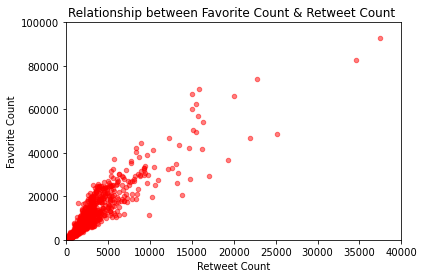

In [207]:
# Plotting Scatter plot for a better visualization

# Graph Size 
plt.figure(figsize = (20, 15))

# Plotting the scatter plot 
weratedog_data.plot(kind= 'scatter', x= 'retweet_count', y = 'favorite_count', alpha=0.5, c = 'red')

# setting annotation 
plt.ylim((0, 100000))
plt.xlim((0, 40000))
plt.ylabel('Favorite Count')
plt.xlabel('Retweet Count')
plt.title('Relationship between Favorite Count & Retweet Count ')
plt.show()

### Observation:
> From our analsys and visalization above we can observe that there seem to be a positive relationship between the rate at which a tweet is liked by followers and the rate at which it is retweeted, although this confirms our initial premise that tweets with high favourite count are also more likely to have a high retweet count. The correleation rate computed shows that there is a stronge correlation of 86% percent. 
>
> To highlight the point we got from computing the correlation, we plotted a scatter plot showing the relationship betwrite ceen favorite count and retweet count. As expected it shows a positive relationship between the rate favourite count and retweet, but we also discovered that not all retweet with a high count also have high favorite count and this make sense in that not all tweet that have hight retweet and can a high favo

### Insight Analysis #2: `what is the ralationship between rating and favourite_count?`
> From our previous insight we discovered there is a postitive relationship between the rate at which people like tweets and the how much they share it to other by retweeting the inital tweet, but this was to just establish that there is a relationship between tweets like and retweet rate. 
>
> In this new insighful analyssi we will be looking at the relationship between the dog rating and the favourite count of each dog. Understanding this relationship will help us know how fair the rating by people is to what people feel about the dog in the tweets. For this analysis we will be making use of the following data:
>
> * `favorite_count`
> * `dog_rating`

In [209]:
weratedog_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'image_url', 'number_images',
       'Prediction_1', 'confid_probability_1', 'image_dog_1', 'Prediction_2',
       'confid_probability_2', 'image_dog_2', 'Prediction_3',
       'confid_probability_3', 'image_dog_3', 'confidence_max', 'breed_type'],
      dtype='object')

In [21]:
# Brief view of the data 
dog_fvra = weratedog_data[['tweet_id', 'favorite_count', 'rating_numerator', 'retweet_count']]

dog_fvra.head()

,tweet_id,favorite_count,rating_numerator,retweet_count
1,892177421306343426,29321,13,5301
2,891815181378084864,22042,12,3478
4,891327558926688256,35308,12,7757
5,891087950875897856,17803,13,2600
6,890971913173991426,10361,13,1661


In [22]:
# Viewing the make up for favorite_count
dog_fvra.favorite_count.value_counts()

990      3
2120     3
2585     2
279      2
3012     2
        ..
8134     1
14627    1
6949     1
11040    1
2292     1
Name: favorite_count, Length: 1351, dtype: int64

In [23]:
# Viewing the make up of dog_rating
dog_fvra.rating_numerator.value_counts()

12     364
10     304
11     300
13     209
9      107
8       58
7       23
14      21
6       12
5       10
4        5
3        3
84       1
45       1
88       1
2        1
26       1
121      1
143      1
44       1
50       1
80       1
99       1
24       1
165      1
27       1
75       1
1        1
Name: rating_numerator, dtype: int64

In [24]:
# Removing dog rating that are greater than 15.00
# As this data set are outlier, and removing them woundn't significantly affect
# the size of the 

dog_fvra = dog_fvra[dog_fvra['rating_numerator'] <= 15.99]

# Test 
dog_fvra.rating_numerator.value_counts()

12    364
10    304
11    300
13    209
9     107
8      58
7      23
14     21
6      12
5      10
4       5
3       3
2       1
1       1
Name: rating_numerator, dtype: int64

In [25]:
# Identifing the correlation between dog rating and favorite count
fvra_corr_df = dog_fvra[['rating_numerator', 'favorite_count']]

fvra_corr = fvra_corr_df.corr()

fvra_corr.style.background_gradient()

,rating_numerator,favorite_count
rating_numerator,1.000000,0.414709
favorite_count,0.414709,1.000000


<Figure size 2500x2500 with 0 Axes>

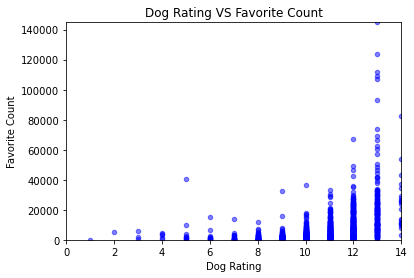

In [26]:
# Plotting Scatter Plot

# Plot Size
plt.figure(figsize=(10,10), dpi=250)

# Scatter Plot 
dog_fvra.plot(kind = 'scatter', x = 'rating_numerator', y = 'favorite_count', alpha = 0.5, color = 'b')

# Plot Annotation
plt.ylim((0, dog_fvra.favorite_count.max()))
plt.xlim((0, dog_fvra.rating_numerator.max()))
plt.ylabel('Favorite Count')
plt.xlabel('Dog Rating')
plt.title('Dog Rating VS Favorite Count')
plt.show()

### Observation: 
> Our analysis turns out to be very interesting from correlation and plot, we can obserse that there seems to be little correlation between this data point meaning that neither the rating nor the favorite count is dependent on the other but there still a positive relationship between the two data because the correlation value of 0.41 or 41% is low compare to our expection. This can also mean there is a bias with the rating system, although this is an assumption it gives room for further analysis. 
> 
> The scatter plot we generated show us that there is a positive relationship between the ratings and favorite count, this goes accouding to our expection and the correlation values. 

### Insight Analysis #3: `What breed of dogs have the highest rating, retweet, and favourite_count ?`

> This analysis aim at understanding what breed type people are most likly to get more retweet, rating, like count. Understating this can help us in predicting which breed of dogs are most likly to get a certain amount of likes , retweets, and rating. To conduct this anlysis we will be using Bar chars and the group by function in pandas. The following dataset would be used in this analysis and they are: 
> 
> * `Favorite Count`
> * `retweet count`
> * `dog_breed`
> * `dog_rating`

In [28]:
# Brief view of dataset
dog_breed = weratedog_data[['tweet_id', 'favorite_count', 'retweet_count', 'rating_numerator', 'breed_type']]

dog_breed.head()

,tweet_id,favorite_count,retweet_count,rating_numerator,breed_type
1,892177421306343426,29321,5301,13,Chihuahua
2,891815181378084864,22042,3478,12,Chihuahua
4,891327558926688256,35308,7757,12,basset
5,891087950875897856,17803,2600,13,Chesapeake_Bay_retriever
6,890971913173991426,10361,1661,13,Appenzeller


In [29]:
# Removing dog rating that are greater than 15.00
# As this data set are outlier, and removing them woundn't significantly affect
# the size of the 

dog_breed = dog_breed[dog_breed['rating_numerator'] <= 15.99]

# Test 
dog_breed.rating_numerator.value_counts()

12    364
10    304
11    300
13    209
9     107
8      58
7      23
14     21
6      12
5      10
4       5
3       3
2       1
1       1
Name: rating_numerator, dtype: int64

In [30]:
# Viewing the make up of dog_rating
dog_breed.rating_numerator.value_counts()

12    364
10    304
11    300
13    209
9     107
8      58
7      23
14     21
6      12
5      10
4       5
3       3
2       1
1       1
Name: rating_numerator, dtype: int64

In [31]:
# Viewing the make up of favorite_count
dog_breed.favorite_count.value_counts()

990      3
2120     3
1051     2
942      2
623      2
        ..
6365     1
8134     1
14627    1
6949     1
2292     1
Name: favorite_count, Length: 1339, dtype: int64

In [32]:
# Viewing the make up of retweet count
dog_breed.retweet_count.value_counts()

209     4
718     4
700     4
551     4
50      4
       ..
3929    1
1671    1
2835    1
1004    1
422     1
Name: retweet_count, Length: 1173, dtype: int64

In [33]:
# Viewing the make up of rating
dog_breed.rating_numerator.value_counts()

12    364
10    304
11    300
13    209
9     107
8      58
7      23
14     21
6      12
5      10
4       5
3       3
2       1
1       1
Name: rating_numerator, dtype: int64

In [35]:
# What breed of dogs are the most common 

most_common = dog_breed.groupby(['breed_type'])['tweet_id'].count().sort_values(ascending = False).head(20)

most_common 

breed_type
golden_retriever            129
Labrador_retriever           88
Pembroke                     85
Chihuahua                    76
pug                          53
chow                         40
Samoyed                      37
Pomeranian                   37
toy_poodle                   36
malamute                     29
cocker_spaniel               27
French_bulldog               25
Chesapeake_Bay_retriever     23
miniature_pinscher           21
German_shepherd              20
Siberian_husky               19
Maltese_dog                  18
Eskimo_dog                   18
Cardigan                     17
Shetland_sheepdog            17
Name: tweet_id, dtype: int64

### Observation: 
> It seems that Golden_retriever is the most common dog in our dataset or tweets, followed by Labrador_retriver, pembroke, chihuahua, pug, chow, etc. next we will be plotting this on a bar char 

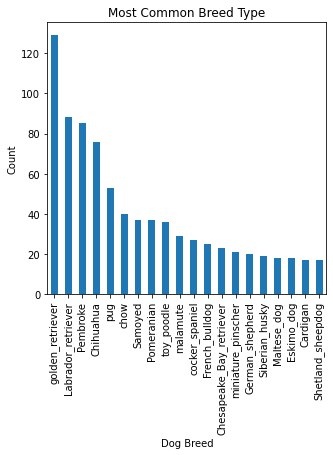

In [36]:
# Plotting a Bar Chart

# Plot Size 
plt.figure(figsize=(5,5))

# Bar Chart 
most_common.plot(kind= 'bar')

# Plot Annotation
plt.ylabel('Count')
plt.xlabel('Dog Breed')
plt.title('Most Common Breed Type')
plt.show()

#### Dog Breed and Like counts

In [229]:
breed_fav = dog_breed[['breed_type', 'favorite_count']] 
breed_fav2 = breed_fav.sort_values('favorite_count', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_fav2.head(20)

,favorite_count
breed_type,
Labrador_retriever,898663
Lakeland_terrier,187070
Chihuahua,589311
French_bulldog,408676
Eskimo_dog,227244
English_springer,121013
standard_poodle,95418
golden_retriever,1445911
Chesapeake_Bay_retriever,206969


In [230]:
breed_fav2.head()

,favorite_count
breed_type,
Labrador_retriever,898663
Lakeland_terrier,187070
Chihuahua,589311
French_bulldog,408676
Eskimo_dog,227244


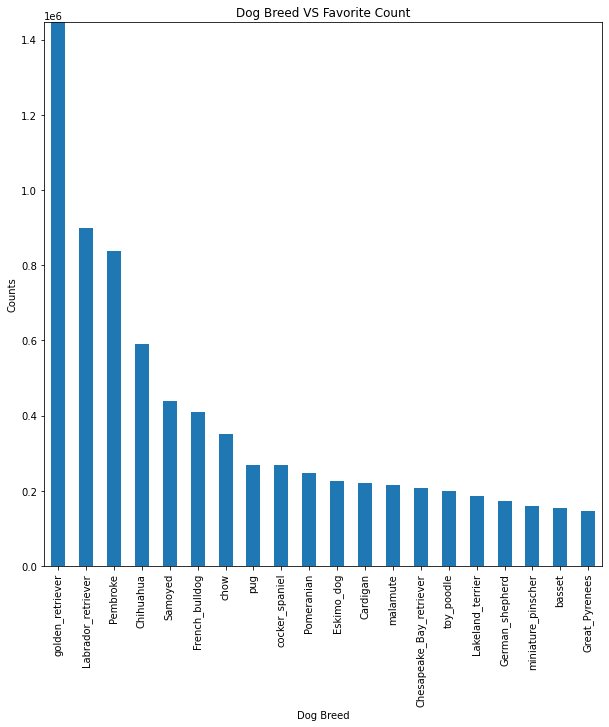

In [231]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
# plt.figure(figsize=(5,5), dpi=250)

# Bar Chart 
breed_fav3 = dog_breed[['breed_type', 'favorite_count']] 
breed_fav3.head()
breed_fav_group = breed_fav3.groupby('breed_type')['favorite_count'].sum().sort_values(ascending = False).head(20)         
breed_fav_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_fav_group.max()))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Favorite Count')
plt.show()

### Observation: 
> Dogs from the golden retriver breed seems to have the highest number of like or favorite by people. this is followed by the labrador retriver, pembroke, etc. 

#### Dog Breed and retweet counts

In [232]:
breed_ret = dog_breed[['breed_type', 'retweet_count']] 
breed_ret2 = breed_ret.sort_values('retweet_count', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_ret2.head(20)

,retweet_count
breed_type,
Labrador_retriever,275614
Eskimo_dog,79413
Chihuahua,179936
Lakeland_terrier,58664
English_springer,43836
standard_poodle,37888
French_bulldog,98110
cocker_spaniel,80495
golden_retriever,400209


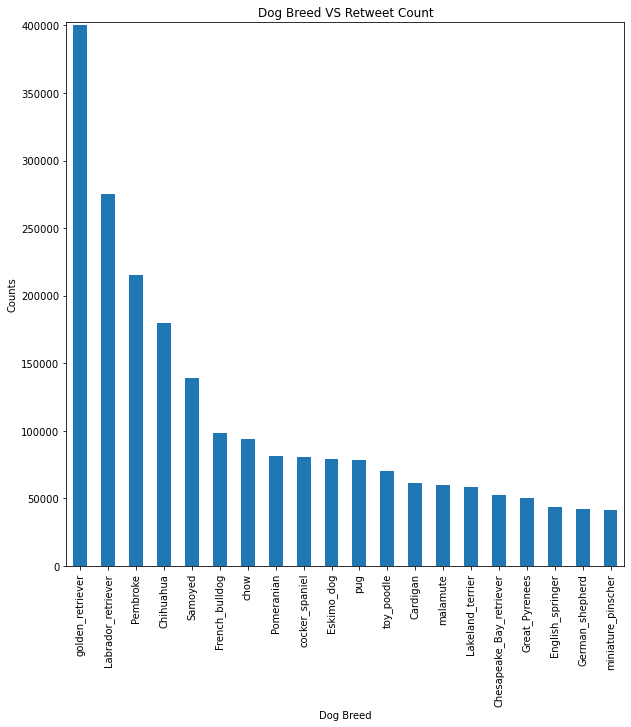

In [233]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
# plt.figure(figsize=(5,5), dpi=250)

# Bar Chart 
breed_ret3 = dog_breed[['breed_type', 'retweet_count']] 
breed_ret3.head()
breed_ret_group = breed_ret3.groupby('breed_type')['retweet_count'].sum().sort_values(ascending = False).head(20)         
breed_ret_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_ret_group.max()+2000))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Retweet Count')
plt.show()

### Observation: 
> There seems to be a correlation between dog that appear the most and the like and retweet count, as the order in which dog breed type appears in the favorite appeared the same way in the retweet section.

#### Dog Breed and Dog Rating

In [234]:
breed_rating = dog_breed[['breed_type', 'rating_numerator']] 
breed_rating2 = breed_rating.sort_values('rating_numerator', ascending = False).groupby(['breed_type'], sort = False).sum()
breed_rating2.head(20)

,rating_numerator
breed_type,
black-and-tan_coonhound,21
golden_retriever,1488
Bedlington_terrier,50
bloodhound,73
Pembroke,973
Rottweiler,192
French_bulldog,281
Eskimo_dog,212
Samoyed,440


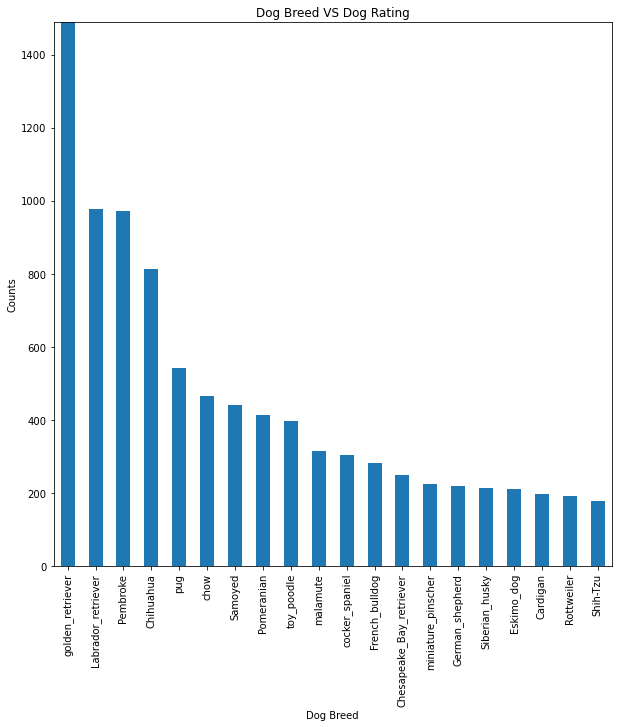

In [235]:
# Plotting a bar Chart showing the relationship between the variable. 

# Plot Size 
# plt.figure(figsize=(5,5), dpi=250)

# Bar Chart 
breed_rating3 = dog_breed[['breed_type', 'rating_numerator']] 
breed_rating3.head()
breed_rating_group = breed_rating3.groupby('breed_type')['rating_numerator'].sum().sort_values(ascending = False).head(20)         
breed_rating_group.plot(kind= 'bar', figsize = (10, 10))

# Plot Annotation 
plt.ylim((0,breed_rating_group.max()))
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Dog Breed VS Dog Rating')
plt.show()

### Limitation: 
> The major limitation that this data set has it is in ability to provide more details about the various feature that each dog has. As we can use this data to predict dog that are most like to get a higher like, retweet, and rating. 